In [57]:
import pandas as pd
from transformers import pipeline
from scipy.stats import zscore
from sklearn.metrics import confusion_matrix
import numpy as np
from sentence_transformers import SentenceTransformer


In [58]:
df = pd.read_csv('in_domain_train.tsv', sep='\t', names=["source", "label", "unused", "text"])

In [59]:
df.label.value_counts() ## a bit imblalanced dataset

label
1    6023
0    2528
Name: count, dtype: int64

In [60]:
classifier = pipeline(
    "text-classification", 
    model="sgugger/bert-fine-tuned-cola", 
)

Device set to use mps:0


In [61]:
texts = df["text"].tolist()
labels = df["label"].tolist()
preds = classifier(texts, top_k=None) # get all class probabilities

In [62]:
acceptable_probabilities = [
    item['score']
    for sample in preds
    for item in sample
    if item['label'] == 'acceptable'
]

df['scores'] = acceptable_probabilities

<Axes: >

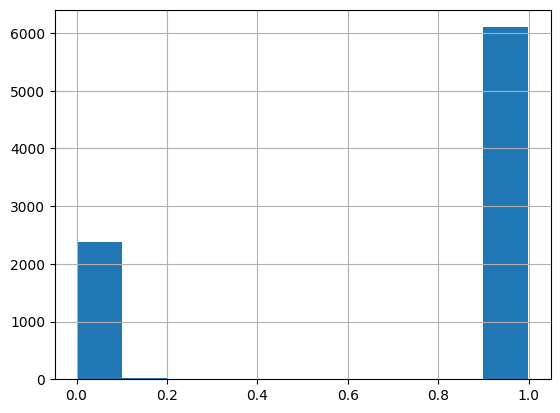

In [63]:
pd.Series(acceptable_probabilities).hist(bins=10)

In [65]:
for i in df[df.scores < 0.99][['text', 'scores']].itertuples(index=False): 
    print(i)

Pandas(text='They drank the pub.', scores=0.006122516933828592)
Pandas(text='The professor talked us.', scores=0.003504162887111306)
Pandas(text='We yelled ourselves.', scores=0.007779703475534916)
Pandas(text='We yelled Harry hoarse.', scores=0.005304767284542322)
Pandas(text='Harry coughed us into a fit.', scores=0.005443277768790722)
Pandas(text='They caused him to become angry by making him.', scores=0.00404939241707325)
Pandas(text='They caused him to become president by making him.', scores=0.0038741962052881718)
Pandas(text='They made him to exhaustion.', scores=0.0033035557717084885)
Pandas(text='The car honked down the road.', scores=0.0053906566463410854)
Pandas(text='The dog barked out of the room.', scores=0.013947444036602974)
Pandas(text='The witch went into the forest by vanishing.', scores=0.005374133121222258)
Pandas(text='The building is tall and tall.', scores=0.023551853373646736)
Pandas(text='This building is taller and taller.', scores=0.9588098526000977)
Pandas(t

In [66]:
df.to_csv('cola_with_scores.csv', index=False)

In [67]:
model_name = 'all-MiniLM-L6-v2'
model = SentenceTransformer(model_name)
embeddings = model.encode(texts, show_progress_bar=False)
output_file = 'text_embeddings.npy'
np.save(output_file, embeddings)

In [68]:
a = np.load(output_file)
a.shape

(8551, 384)